In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import pylab as plt

import portfolioopt as pfopt
from scipy.stats import norm

import seaborn as sns



import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from finances.market import market_data as mkt_data
from finances.portfolio.portfolio_optimization import generate_projected_normal_sample, markowitz_efficient_frontier

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


# Optimal portfolio allocation

In [2]:
mkt=mkt_data.MarketData()
returns_data = mkt.crypto_returns_data(
    symbols=['ADA', 'XMR', 'BTC', 'NEO', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP', 'DASH'],
    time_step='D',
    ).dropna()

returns_data.head()


Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


,ADA,XMR,BTC,NEO,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XRP,DASH
2017-10-04,0.050526,-0.030237,-0.023236,-0.075569,-0.118873,-0.002203,-0.041141,-0.029032,-0.020979,0.324326,-0.044431,-0.047262,0.053298,0.028149
2017-10-05,-0.016399,0.019932,0.027342,0.039914,-0.085577,0.014808,-0.067997,-0.007302,0.009105,0.025453,-0.014873,0.234652,0.107789,0.003635
2017-10-06,-0.134700,-0.004326,0.012815,0.041518,0.178987,0.046145,-0.026483,-0.066483,0.011725,-0.094892,-0.003358,0.266330,-0.009608,0.007850
2017-10-07,0.129565,0.005593,0.012831,0.078162,-0.084889,0.008199,0.000304,0.069681,0.008826,-0.179239,-0.063694,0.138890,0.019531,0.011764
2017-10-08,-0.022157,-0.021047,0.041472,-0.112618,-0.082948,-0.008068,-0.083438,-0.071485,0.010650,0.028874,-0.142857,-0.112649,0.173228,-0.025798


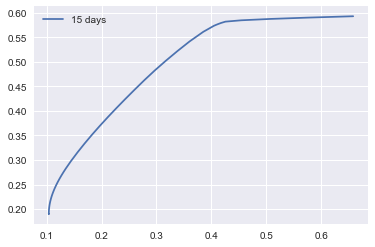

In [3]:
n_days = 15

sns.set()
# sns.set_palette('YlOrRd', 12)
for days in [n_days]:#range(1,30, 5):
    monthly_returns = generate_projected_normal_sample(returns_data, days)
    rewards, risks = markowitz_efficient_frontier(monthly_returns)
    plt.plot(risks, rewards, label='%i days' % days)
plt.legend()

In [4]:
avg_rets = generate_projected_normal_sample(returns_data, n_days).mean()
cov_mat = generate_projected_normal_sample(returns_data, n_days).cov()
x = pfopt.markowitz_portfolio(cov_mat=cov_mat, exp_rets=avg_rets, target_ret=0.2)
optimal_portfolio = pfopt.truncate_weights(x, min_weight=0.03, rescale=True)
optimal_portfolio

ADA     0.000000
XMR     0.109759
BTC     0.178637
NEO     0.089586
EMC2    0.000000
ETH     0.191301
FUN     0.049667
IOTA    0.059167
LTC     0.084100
TRX     0.000000
UBQ     0.056927
XLM     0.038251
XRP     0.043416
DASH    0.099191
dtype: float64

## Portfolio analysis

In [5]:
value_to_invest = 2000

In [6]:
analysis_df = pd.DataFrame()
analysis_df['allocation'] = optimal_portfolio
prices = [mkt.get_coin_price(coin) for coin in analysis_df.index]
analysis_df['Prices'] = prices
analysis_df['allocation_euros'] = analysis_df['allocation']*value_to_invest
analysis_df['coin_quantities']= analysis_df['allocation_euros']/analysis_df['Prices']

In [7]:
analysis_df

,allocation,Prices,allocation_euros,coin_quantities
ADA,0.000000,0.271607,0.000000,0.000000
XMR,0.109759,153.661905,219.517509,1.428575
BTC,0.178637,5849.300129,357.273541,0.061080
NEO,0.089586,70.815028,179.171248,2.530130
EMC2,0.000000,0.240868,0.000000,0.000000
ETH,0.191301,582.555762,382.602730,0.656766
FUN,0.049667,0.032275,99.334717,3077.775742
IOTA,0.059167,1.217883,118.333390,97.163181
LTC,0.084100,104.879414,168.199320,1.603740
TRX,0.000000,0.025914,0.000000,0.000000
